In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import pearsonr, spearmanr

def read_metric(path):
    with open(path, 'rb') as f:
        dict_split = pickle.load(f)
        split = {}
        for k, v in dict_split.items():
            true, pred, ctrl, de_idx = v.values()
            true = true[de_idx]
            pred = pred[de_idx]
            ctrl = ctrl[de_idx]
            mse_k = mse(true, pred)/mse(true, ctrl)
            pear_k = pearsonr(true-ctrl, pred-ctrl)[0]
            spear_k = spearmanr(true, pred)[0]
            split[k] = {'NormMSE':mse_k, 'Pearson':pear_k, 'Spearman':spear_k}
        split = pd.DataFrame.from_dict(split, orient='index')
    return split

## Read results on `dixit` dataset

In [2]:
scouter_dixit = pd.read_csv('../../results/Scouter/Scouter_dixit_result.csv', index_col=0).assign(Method='Scouter')

biolord_dixit = []; gears_dixit = []
for i in range(1,11):
    biolord = read_metric(f'../../results/biolord/biolord_dixit_{i}.pkl').assign(split=i)
    biolord_dixit.append(biolord)
    
    gears = read_metric(f'../../results/GEARS/GEARS_dixit_unseen_single_{i}.pkl').assign(split=i)
    gears_dixit.append(gears)

biolord_dixit = pd.concat(biolord_dixit).assign(Method='biolord')
gears_dixit = pd.concat(gears_dixit).assign(Method='GEARS')

dixit_all = pd.concat([scouter_dixit, gears_dixit])
dixit_all.to_csv('../../results/dixit.csv')
dixit_all = pd.concat([scouter_dixit, biolord_dixit, gears_dixit])

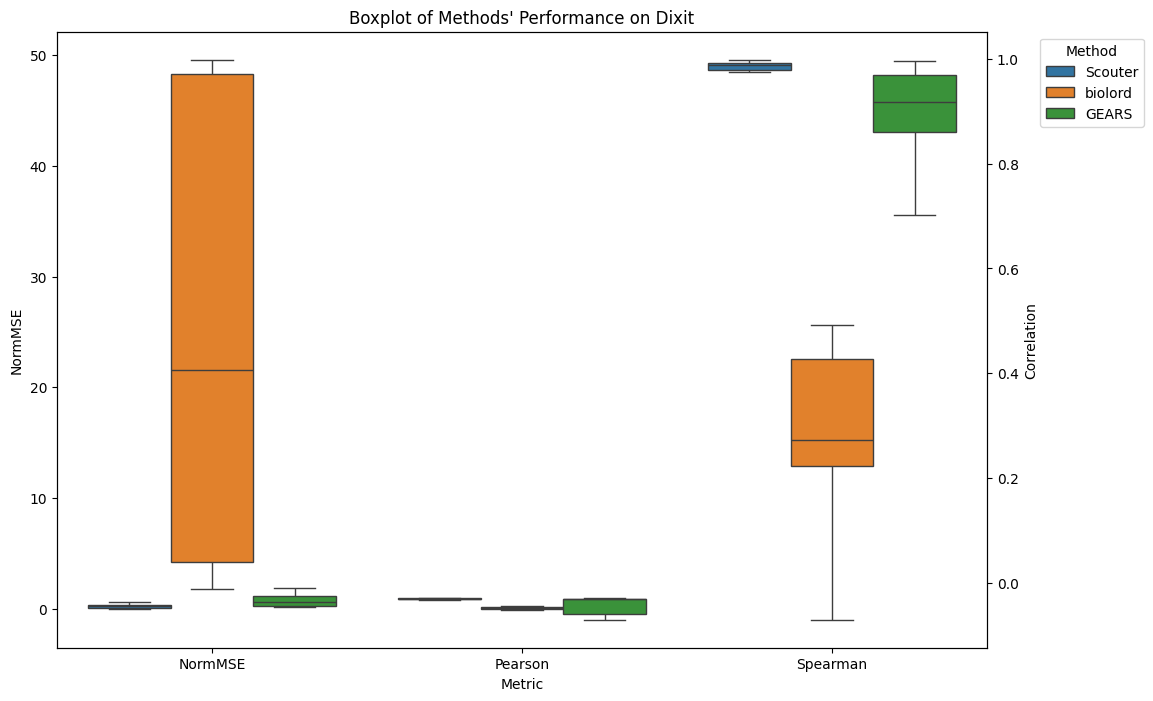

In [3]:
dixit_melted = dixit_all.melt(id_vars=['Method'], value_vars=['NormMSE', 'Pearson', 'Spearman'], 
                                var_name='Metric', value_name='Value')
fig, ax1 = plt.subplots(figsize=(12, 8), dpi=100)
sns.boxplot(data=dixit_melted[dixit_melted['Metric'].isin(['NormMSE', 'Pearson'])],
            x='Metric', y='Value', hue='Method', ax=ax1, showfliers=False)
ax1.set_title("Boxplot of Methods' Performance on Dixit")
ax1.set_xlabel('Metric')
ax1.set_ylabel('NormMSE')
ax2 = ax1.twinx()
sns.boxplot(data=dixit_melted[dixit_melted['Metric'] == 'Spearman'],
            x='Metric', y='Value', hue='Method', ax=ax2, showfliers=False)
ax2.set_ylabel('Correlation')
ax2.legend_.remove()
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Read results on `Adamson` dataset

In [4]:
scouter_adamson = pd.read_csv('../../results/Scouter/Scouter_adamson_result.csv', index_col=0).assign(Method='Scouter')
biolord_adamson = []; gears_adamson = []
for i in range(1,6):
    biolord = read_metric(f'../../results/biolord/biolord_adamson_{i}.pkl').assign(split=i)
    biolord_adamson.append(biolord)
    
    gears = read_metric(f'../../results/GEARS/GEARS_adamson_{i}.pkl').assign(split=i)
    gears_adamson.append(gears)

biolord_adamson = pd.concat(biolord_adamson).assign(Method='biolord')
gears_adamson = pd.concat(gears_adamson).assign(Method='GEARS')

adamson_all = pd.concat([scouter_adamson, biolord_adamson, gears_adamson])
adamson_all.to_csv('../../results/adamson.csv')

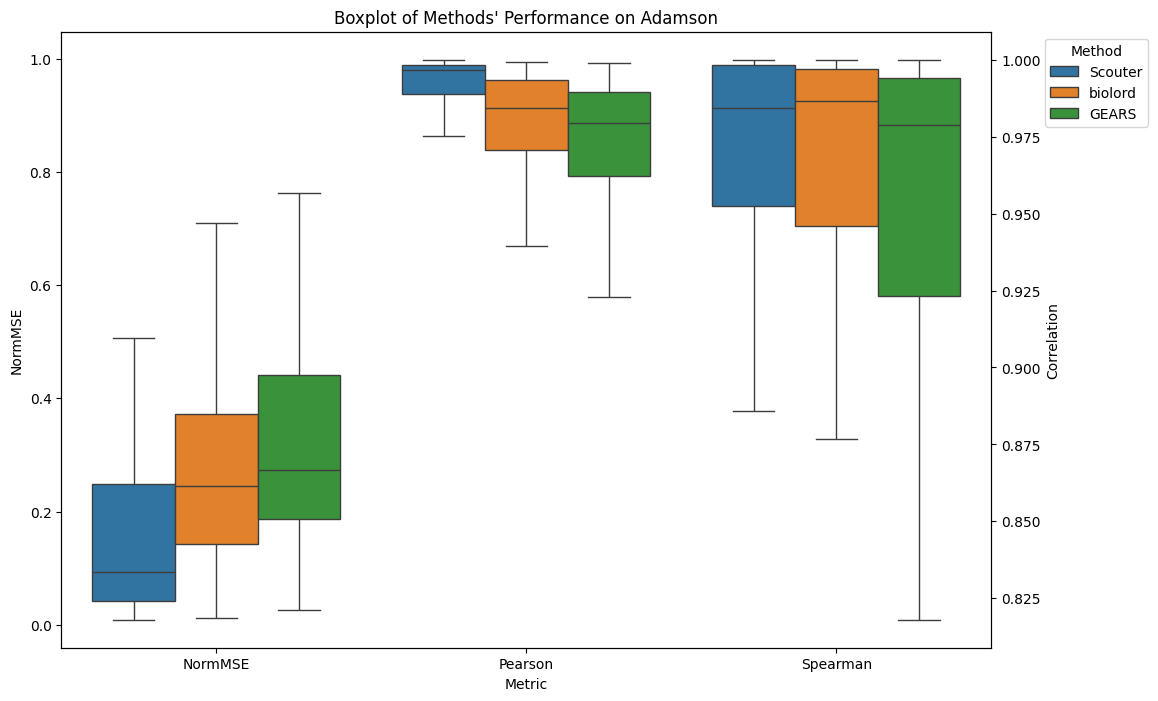

In [5]:
adamson_melted = adamson_all.melt(id_vars=['Method'], value_vars=['NormMSE', 'Pearson', 'Spearman'], 
                                var_name='Metric', value_name='Value')
fig, ax1 = plt.subplots(figsize=(12, 8), dpi=100)
sns.boxplot(data=adamson_melted[adamson_melted['Metric'].isin(['NormMSE', 'Pearson'])],
            x='Metric', y='Value', hue='Method', ax=ax1, showfliers=False)
ax1.set_title("Boxplot of Methods' Performance on Adamson")
ax1.set_xlabel('Metric')
ax1.set_ylabel('NormMSE')
ax2 = ax1.twinx()
sns.boxplot(data=adamson_melted[adamson_melted['Metric'] == 'Spearman'],
            x='Metric', y='Value', hue='Method', ax=ax2, showfliers=False)
ax2.set_ylabel('Correlation')
ax2.legend_.remove()
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Read results on `Norman` dataset

In [6]:
scouter_norman = pd.read_csv('../../results/Scouter/Scouter_norman_result.csv', index_col=0).assign(Method='Scouter')
biolord_norman = []; gears_norman = []
for i in range(1,6):
    biolord_single = read_metric(f'../../results/biolord/biolord_norman_unseen_single_{i}.pkl').assign(split=i, subgroup='single')
    biolord_seen0 = read_metric(f'../../results/biolord/biolord_norman_combo_seen0_{i}.pkl').assign(split=i, subgroup='seen0')
    biolord_seen1 = read_metric(f'../../results/biolord/biolord_norman_combo_seen1_{i}.pkl').assign(split=i, subgroup='seen1')
    biolord_seen2 = read_metric(f'../../results/biolord/biolord_norman_combo_seen2_{i}.pkl').assign(split=i, subgroup='seen2')
    biolord_norman.append(pd.concat([biolord_single, biolord_seen0, biolord_seen1,biolord_seen2]))
    
    gears_single = read_metric(f'../../results/GEARS/GEARS_norman_unseen_single_{i}.pkl').assign(split=i, subgroup='single')
    gears_seen0 = read_metric(f'../../results/GEARS/GEARS_norman_combo_seen0_{i}.pkl').assign(split=i, subgroup='seen0')
    gears_seen1 = read_metric(f'../../results/GEARS/GEARS_norman_combo_seen1_{i}.pkl').assign(split=i, subgroup='seen1')
    gears_seen2 = read_metric(f'../../results/GEARS/GEARS_norman_combo_seen2_{i}.pkl').assign(split=i, subgroup='seen2')
    gears_norman.append(pd.concat([gears_single, gears_seen0, gears_seen1,gears_seen2]))

biolord_norman = pd.concat(biolord_norman).assign(Method='biolord')
gears_norman = pd.concat(gears_norman).assign(Method='GEARS')

metric_all = pd.concat([scouter_norman, biolord_norman, gears_norman])
metric_all['subgroup'] = pd.Categorical(metric_all['subgroup'], categories=['single', 'seen2', 'seen1', 'seen0'], ordered=True)
metric_all.to_csv('../../results/norman.csv')

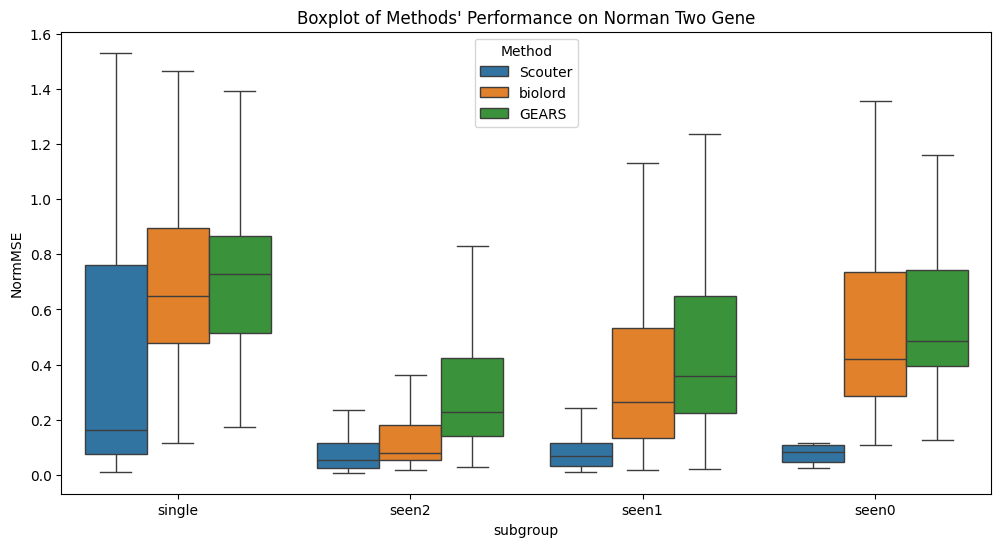

In [7]:
plt.figure(figsize=(12,6), dpi=100)
sns.boxplot(data=metric_all, x="subgroup", y="NormMSE", hue="Method", showfliers=False)
plt.title("Boxplot of Methods' Performance on Norman Two Gene")
plt.show()

## Read results on `Replogle K562` dataset`

In [8]:
scouter_k562 = pd.read_csv('../../results/Scouter/Scouter_k562_result.csv', index_col=0).assign(Method='Scouter')
biolord_k562 = []; gears_k562 = []
for i in range(1,6):
    biolord = read_metric(f'../../results/biolord/biolord_k562_{i}.pkl').assign(split=i)
    biolord_k562.append(biolord)
    
    gears = read_metric(f'../../results/GEARS/GEARS_k562_unseen_single_{i}.pkl').assign(split=i)
    gears_k562.append(gears)

biolord_k562 = pd.concat(biolord_k562).assign(Method='biolord')
gears_k562 = pd.concat(gears_k562).assign(Method='GEARS')

k562_all = pd.concat([scouter_k562, biolord_k562, gears_k562])
k562_all.to_csv('../../results/k562.csv')

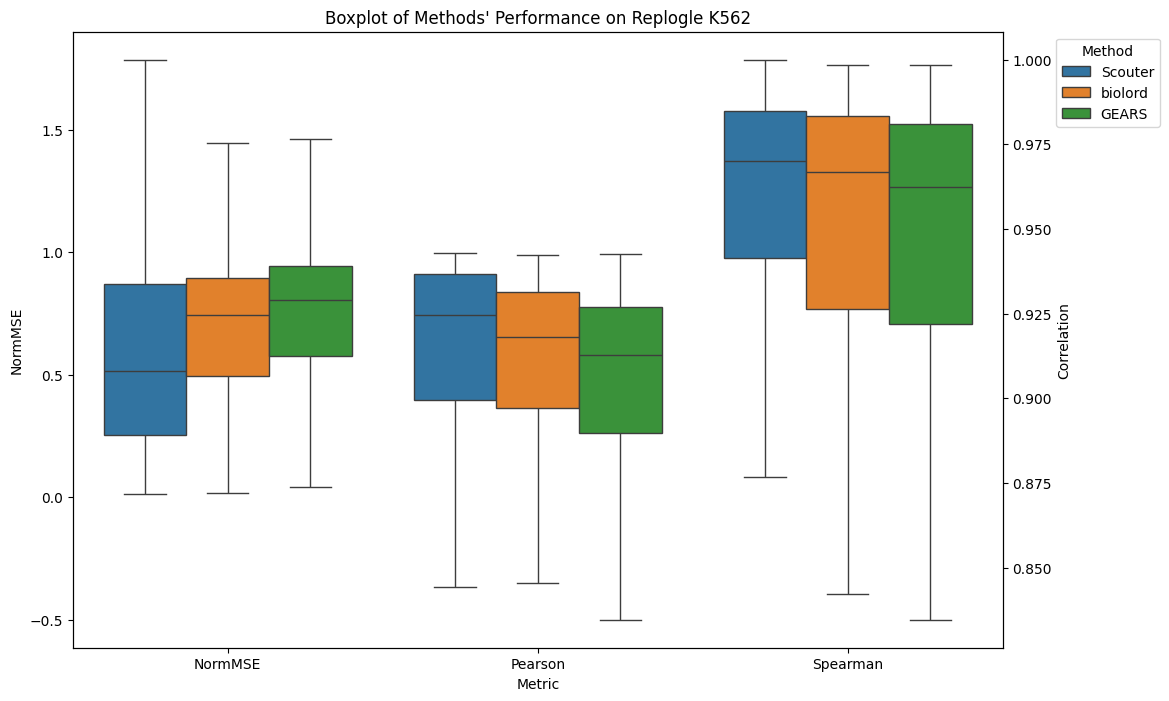

In [9]:
k562_melted = k562_all.melt(id_vars=['Method'], value_vars=['NormMSE', 'Pearson', 'Spearman'], 
                                var_name='Metric', value_name='Value')
fig, ax1 = plt.subplots(figsize=(12, 8), dpi=100)
sns.boxplot(data=k562_melted[k562_melted['Metric'].isin(['NormMSE', 'Pearson'])],
            x='Metric', y='Value', hue='Method', ax=ax1, showfliers=False)
ax1.set_title("Boxplot of Methods' Performance on Replogle K562")
ax1.set_xlabel('Metric')
ax1.set_ylabel('NormMSE')
ax2 = ax1.twinx()
sns.boxplot(data=k562_melted[k562_melted['Metric'] == 'Spearman'],
            x='Metric', y='Value', hue='Method', ax=ax2, showfliers=False)
ax2.set_ylabel('Correlation')
ax2.legend_.remove()
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Read results on `Replogle RPE1` dataset`

In [10]:
scouter_rpe1 = pd.read_csv('../../results/Scouter/Scouter_rpe1_result.csv', index_col=0).assign(Method='Scouter')
biolord_rpe1 = []; gears_rpe1 = []
for i in range(1,6):
    biolord = read_metric(f'../../results/biolord/biolord_rpe1_{i}.pkl').assign(split=i)
    biolord_rpe1.append(biolord)
    
    gears = read_metric(f'../../results/GEARS/GEARS_rpe1_unseen_single_{i}.pkl').assign(split=i)
    gears_rpe1.append(gears)

biolord_rpe1 = pd.concat(biolord_rpe1).assign(Method='biolord')
gears_rpe1 = pd.concat(gears_rpe1).assign(Method='GEARS')

rpe1_all = pd.concat([scouter_rpe1, biolord_rpe1, gears_rpe1])
rpe1_all.to_csv('../../results/rpe1.csv')

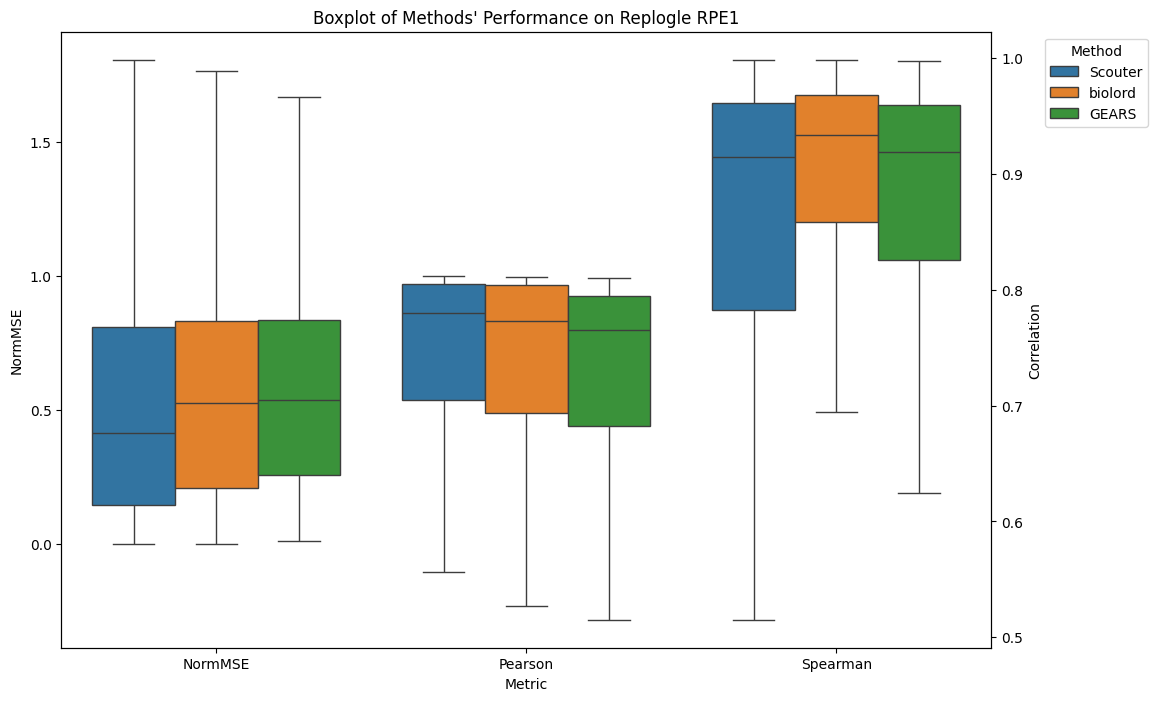

In [11]:
rpe1_melted = rpe1_all.melt(id_vars=['Method'], value_vars=['NormMSE', 'Pearson', 'Spearman'], 
                                var_name='Metric', value_name='Value')
fig, ax1 = plt.subplots(figsize=(12, 8), dpi=100)
sns.boxplot(data=rpe1_melted[rpe1_melted['Metric'].isin(['NormMSE', 'Pearson'])],
            x='Metric', y='Value', hue='Method', ax=ax1, showfliers=False)
ax1.set_title("Boxplot of Methods' Performance on Replogle RPE1")
ax1.set_xlabel('Metric')
ax1.set_ylabel('NormMSE')
ax2 = ax1.twinx()
sns.boxplot(data=rpe1_melted[rpe1_melted['Metric'] == 'Spearman'],
            x='Metric', y='Value', hue='Method', ax=ax2, showfliers=False)
ax2.set_ylabel('Correlation')
ax2.legend_.remove()
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()